---
<h1 align=center><strong><em>Social Network Ads</em></strong></h1>

---


# 1) Mise en place de l'environnement de travail

## a) Importer toutes les librairies nécessaires 

In [149]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("darkgrid")

from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.neighbors import KNeighborsClassifier

# pour la cross validation:
    # pour le tri du jeu d'entrainement
from sklearn.model_selection import KFold # partage le set en n groupes de manière aléatoire 
from sklearn.model_selection import LeaveOneOut # le jeu va être validé sur un seul individu => temps de calculs très long
from sklearn.model_selection import ShuffleSplit # idem KFold sauf que le jeu va être mélanger aprés chaque validation
from sklearn.model_selection import StratifiedKFold # permet de faire des groupes homogènes contenent chacun la même proportion de chaque variables
from sklearn.model_selection import GroupKFold # si une variable est catégorielle => avoir autant de chaque catégorie exemple autant de 1er classe que de 2nd classe
    # pour réaliser le tri sur le jeu d'entrainement et des variables simplement
from sklearn.model_selection import GridSearchCV 

# pour obtenir le score d'un model
from sklearn.model_selection import cross_val_score

# pour la vaildation curve
from sklearn.model_selection import validation_curve # permet de visualiser les résultats avec les différents hyperparamètres

# pour la learning curve
from sklearn.model_selection import learning_curve # permet de savoir s'il y a assez de données ou si plus de données donneraient une meilleure performance

# pour la sauvegarde des meilleurs paramètres
import pickle
import joblib # à approfondir ... différence entre pickle et joblib

# pour un obtenir le temps d'un calcul
from time import time

## b) Chargement du Dataset

In [150]:
publicite = pd.read_csv('publicite.xls')
publicite.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# 2) Nettoyage

In [151]:
publicite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


On voit tout de suite ici que nous avons aucunes valeurs nulles.

In [152]:
publicite[publicite.duplicated()]

,User ID,Gender,Age,EstimatedSalary,Purchased


On vérifie que nous n'avons pas de ligne similaire, de doublon.

In [153]:
publicite.drop(["User ID"], axis=1, inplace=True)

La colonne 'User ID' étant inutile, on décide de la supprimer.

In [154]:
publicite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


Notre Dataset est prêt et nettoyé, la colonne a bien été supprimée et il n'y a pas de valeurs nulles.

# 3) Analyse Eploratoire des données

## a) Visualisation numérique

In [155]:
publicite.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


<strong><em><h5>

<ul>

<li>Age : la moyenne d'age est de 38 ans réparti entre 18 et 60 ans</li>

<li>Le salaire éstimé : le salaire moyen est d'environ 70.000 réparti entre 34.000 et 150.000</li>

<li>Commande : Un client commande dans 35.7% des cas</li>

</ul></h5></em></strong>

In [156]:
publicite['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

<strong><em><h5><ul><li>Le genre est très bien réparti avec 204 femmes pour 196 hommes.</li></ul></h5>

## b) Visualisation graphique

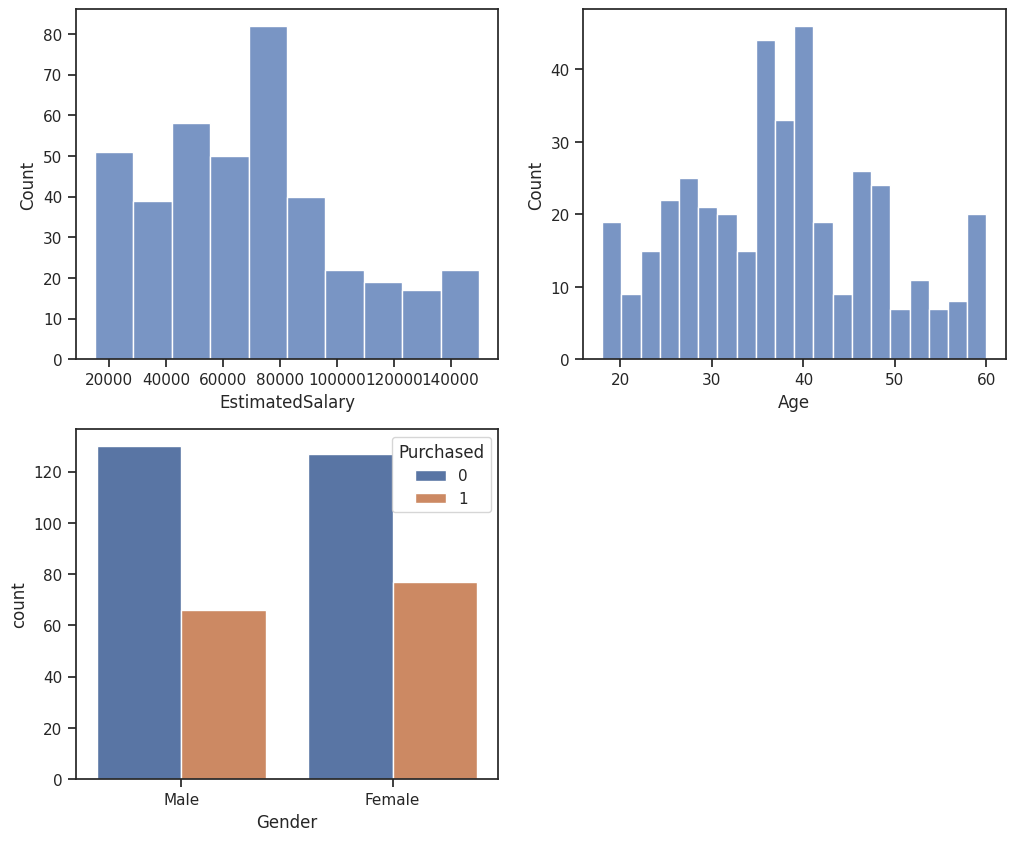

In [157]:
sns.set(style="ticks") 
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.histplot(x='EstimatedSalary', data=publicite, bins=10)
plt.subplot(2,2,2)
sns.histplot(x='Age', data=publicite, bins=20)
plt.subplot(2,2,3)
sns.countplot(x='Gender', hue='Purchased', data=publicite)
plt.show()

<strong><em><h5>

<ul>

<li>1er graphique (haut à gauche) : distribution normale pour les salaires.</li>

<li>2ème graphique (haut à droite) : distribution normale pour les âges.</li>

<li>3ème raphique (bas à gauche) : répartition des achats suivant le genre. On remarque que le genre n'a pas d'inscidence sur le fait d'acheter ou non.</li>

</ul></h5></em></strong>

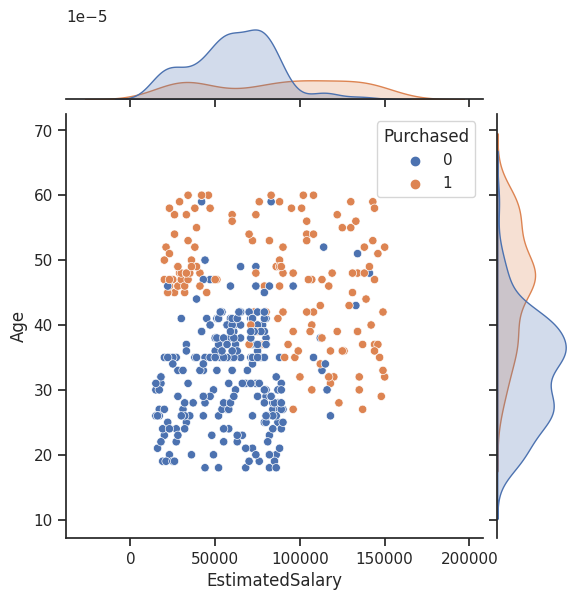

In [158]:
sns.jointplot(data=publicite, x='EstimatedSalary', y='Age', hue='Purchased')
plt.show()

<strong><em><h5>

<ul>

<li>Les jeunes (20-40ans) ayant un bas salaire (-100k€), ils n'achètent pas.</li>

<li>Les autres sont une potentielle cible. Peu importe l'âge à +100K€ et peu importe le salaire au dessus de 45 ans.</li>

</ul></h5></em></strong>

## c) Conclusion

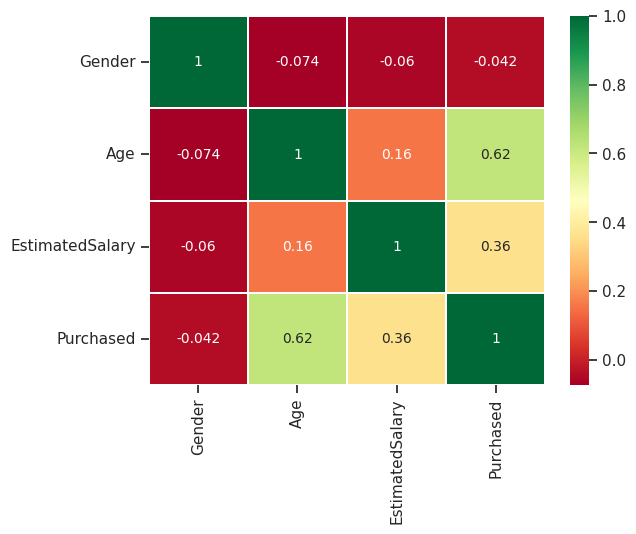

In [159]:
transform = LabelEncoder()
publicite["Gender"] = LabelEncoder().fit_transform(publicite.Gender)

sns.heatmap(publicite.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
plt.show()

<strong><em><h5>

<ul>

<li>La heatmap confirme que c'est l'âge qui aura le plus d'impact sur le fait d'acheter ou non car la corrélation entre les deux variables est proche de 1.</li>

<li>Le salaire aura lui aussi un impact mais beaucoup moins important.</li>

<li>Le genre lui n'influe pas sur les résultas (on peut supprime donc la colonne).</li>

</ul></h5></em></strong>

In [160]:
publicite.drop(["Gender"], axis=1, inplace=True)
publicite.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


# 5) Learning curve

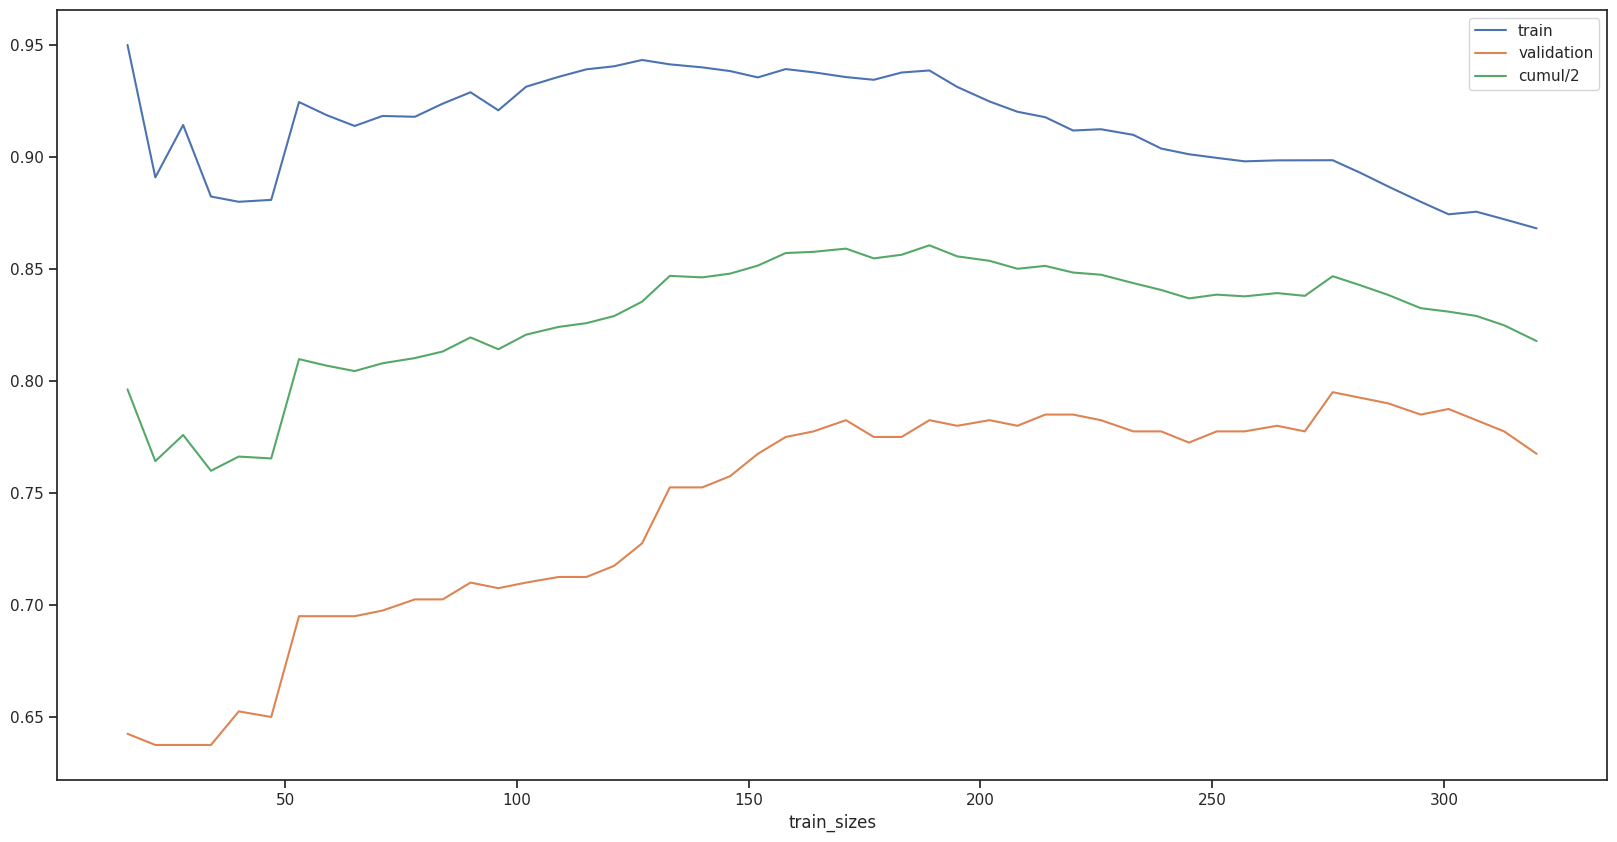

In [161]:
model = KNeighborsClassifier()

N, train_score, val_score = learning_curve(model, publicite.iloc[:,:-1], publicite['Purchased'],train_sizes=np.linspace(0.05, 1.0, 50))

plt.figure(figsize=(20,10))
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.plot(N, (val_score.mean(axis=1)+train_score.mean(axis=1))/2, label='cumul/2')
plt.xlabel('train_sizes')
plt.legend()
plt.show()

<strong><em><h5>

<ul>

<li>Le modèle est performant avec un petit moins de la moitié du jeu de données donc on va splitter le dataset en fonction.</li>

</ul></h5></em></strong>

# 6) Splitter le dataset

In [162]:
X_train, X_test, y_train, y_test = train_test_split(publicite.iloc[:,:-1], publicite["Purchased"], test_size=0.55, random_state=3)

# 7) Mise à l'échelle

In [163]:
scaler_liste,score = [StandardScaler(),MinMaxScaler(),RobustScaler()],0
for i in scaler_liste:
    scaler = i.fit_transform(X_train)
    model = KNeighborsClassifier()
    model.fit(scaler,y_train)
    result = model.score(scaler,y_train)
    print(f"Avec le scaler ", str(i), "le score est de ", result)
    if result>score:
        best_scaler=i
        score=result

Avec le scaler  StandardScaler() le score est de  0.9217877094972067
Avec le scaler  MinMaxScaler() le score est de  0.9217877094972067
Avec le scaler  RobustScaler() le score est de  0.9217877094972067


StandardScaler()

In [164]:
sc=best_scaler
x_train_scaled=sc.fit_transform(X_train)
x_test_scaled=sc.transform(X_test)

# 8) Cross validation

## a) Avec choix manuel de la distribution du jeu d'entrainement

In [165]:
param_grid = {'n_neighbors': np.arange(1, 50),
              'metric': ['euclidean', 'manhattan']}

model_selection ={"StatifiedKFold": StratifiedKFold(4),
                "Kfold": KFold(4),
                "ShuffleSplit": ShuffleSplit(4)}
score=0                
for v in model_selection.values():
    debut = time()
    grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=v)
    grid.fit(x_train_scaled, y_train)
    fin = time()
    if grid.best_score_>score:
        best_model=grid.best_estimator_
        score=grid.best_score_
        best_model_selection = v


    print("Le meilleur score avec ",str(v).split("(",1)[0],"est",grid.best_score_,"avec les parametres",
        grid.best_params_,"calcumlé en",round(fin-debut,2),"secondes.")


Le meilleur score avec  StratifiedKFold est 0.9330808080808081 avec les parametres {'metric': 'euclidean', 'n_neighbors': 7} calcumlé en 2.23 secondes.
Le meilleur score avec  KFold est 0.9275252525252525 avec les parametres {'metric': 'euclidean', 'n_neighbors': 7} calcumlé en 2.05 secondes.
Le meilleur score avec  ShuffleSplit est 0.9583333333333333 avec les parametres {'metric': 'euclidean', 'n_neighbors': 8} calcumlé en 1.49 secondes.


# 9) Score sur le jeu de test

In [168]:
score_test = cross_val_score(best_model, x_test_scaled, y_test, cv=best_model_selection).mean()
print("Sur le jeu de test on obtient", score_test)

Sur le jeu de test on obtient 0.9130434782608696


# 10) Sauvegarde du modèle

In [169]:
model_complet={ "scaler": best_scaler,

                "model": best_model,}

joblib.dump(model_complet, 'model_publicite.joblib')

['model_publicite.joblib']